# Bike Sharing Case Study


This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

In [1]:
#importing all the necessary libraries that is to be used
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Step-1 Reading and understanding the dataset

In [2]:
#set command to display max columns
pd.set_option('display.max_columns',100)

In [3]:
#uploading and reading the day dataset
bike_shr=pd.read_csv('day.csv')

In [4]:
#checking and displaying first five rows
bike_shr.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#displaying the no of rows and cols
bike_shr.shape

(730, 16)

In [6]:
#checking the datatypes for the cols available
bike_shr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#converting the values of below cols to categorical values
bike_shr['season']=bike_shr.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_shr['mnth']=bike_shr.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_shr['weathersit']=bike_shr.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_shr['weekday']=bike_shr.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [8]:
#again checking the datatype of the cols
bike_shr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [9]:
#checking the null values if any present in the cols
round(100*(bike_shr.isnull().sum()/bike_shr.shape[0]),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
#checking for the unique values present in each cols
bike_shr.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

# Step2- Data visualization of the continous variables

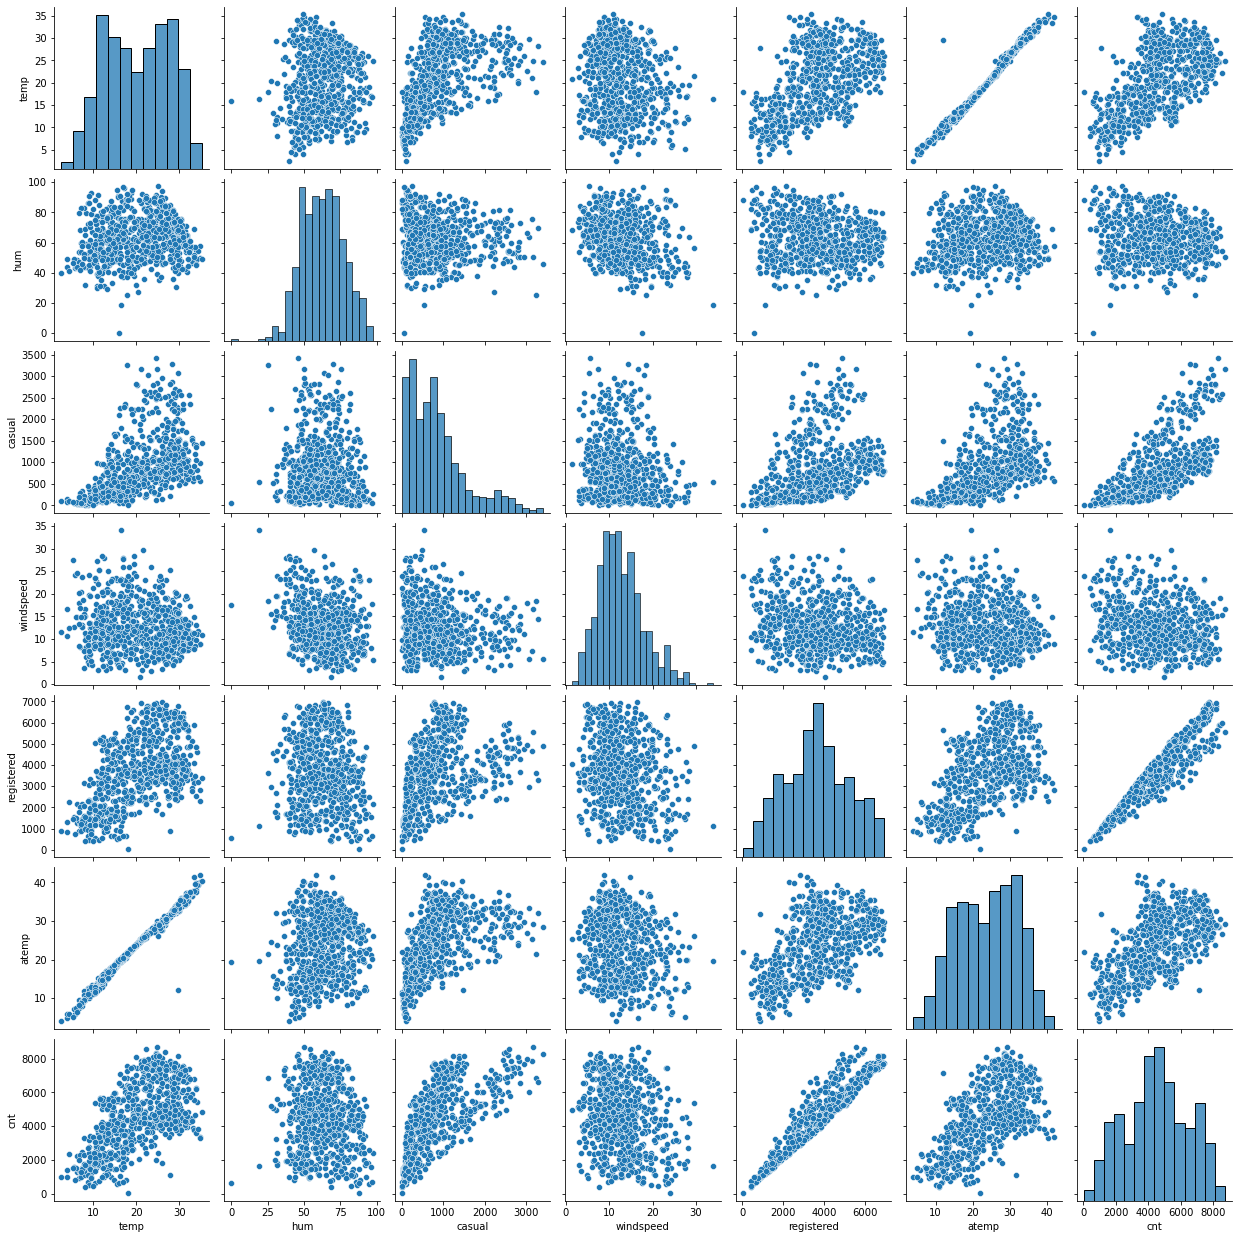

In [51]:
#plotting scatter plot for the continous variables
sns.pairplot(bike_shr[['temp','hum','casual','windspeed','registered','atemp','cnt']])
plt.show()

From the above plot it is observed that :
casual and registered are positively corelated to count
temp is positivley corelated to count


# Data visualization for categorial variables

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

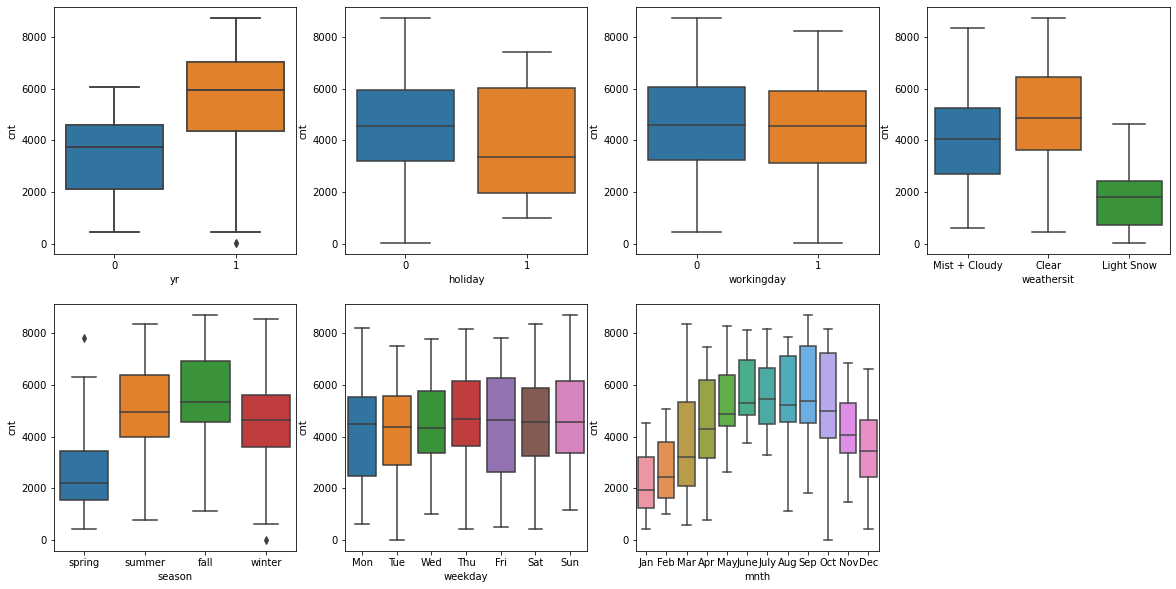

In [11]:
#plotting boxplot for categorial variables
plt.figure(figsize=[20,10])

plt.subplot(2,4,1)
sns.boxplot(data=bike_shr,x='yr',y='cnt')

plt.subplot(2,4,1)
sns.boxplot(data=bike_shr,x='yr',y='cnt')

plt.subplot(2,4,2)
sns.boxplot(data=bike_shr,x='holiday',y='cnt')

plt.subplot(2,4,3)
sns.boxplot(data=bike_shr,x='workingday',y='cnt')

plt.subplot(2,4,4)
sns.boxplot(data=bike_shr,x='weathersit',y='cnt')

plt.subplot(2,4,5)
sns.boxplot(data=bike_shr,x='season',y='cnt')

plt.subplot(2,4,6)
sns.boxplot(data=bike_shr,x='weekday',y='cnt')

plt.subplot(2,4,7)
sns.boxplot(data=bike_shr,x='mnth',y='cnt')

From the analysis of the categorical variable it is identified  that  the dependent variable i.e  bike rental count 
•	Is more for the year 2019
•	When the weather situation is clear
•	Is more during the fall of season
•	Is more for  the month of september


# Plotting heatmap for the variables to check corelation

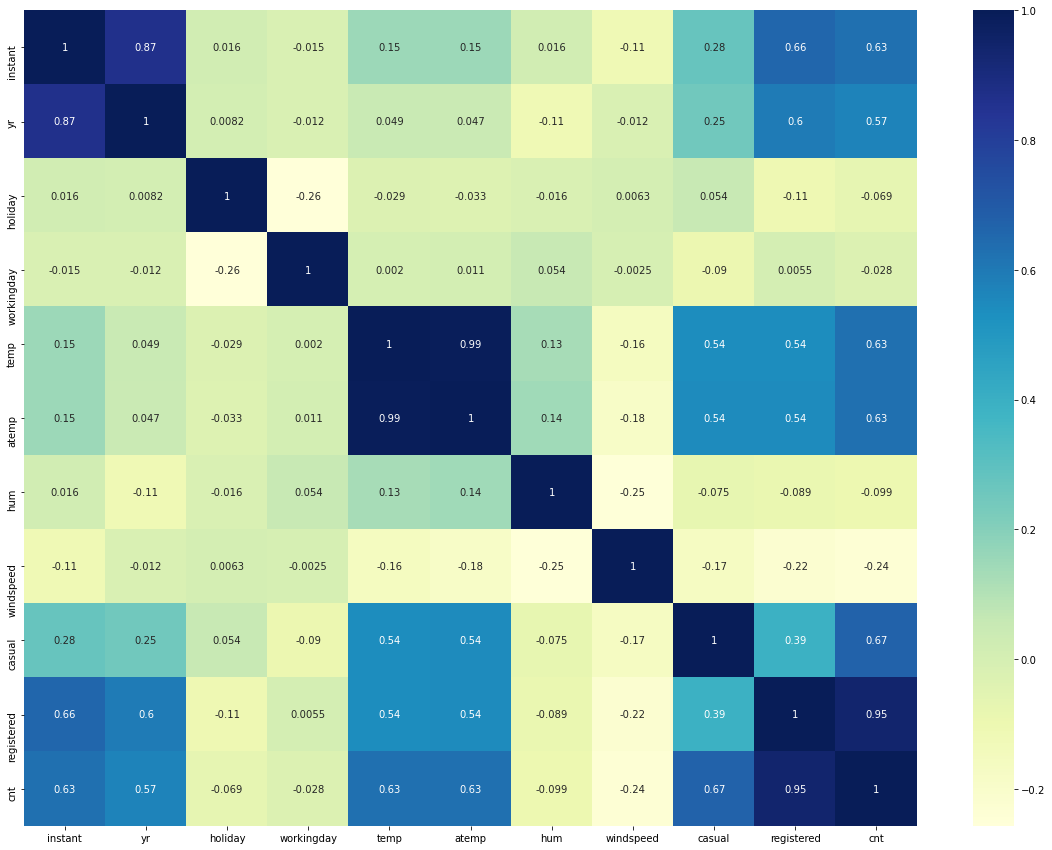

In [67]:
#plotting the heatmap
plt.figure(figsize=[20,15])
sns.heatmap(bike_shr.corr(),annot=True,cmap='YlGnBu')
plt.show()

From the above heatmap we could see that cnt varibale is positivley corelated with registered,casual,temp and negativley corelated to windspeed,humidity

In [53]:
bike_shr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


# Step3 -Data preparation

In [12]:
#creating dummy variable for the below cols as they are having 3 or more of level of values 
month=pd.get_dummies(bike_shr['mnth'],drop_first=True)
ssn=pd.get_dummies(bike_shr['season'],drop_first=True)
wd=pd.get_dummies(bike_shr['weekday'],drop_first=True)
ws=pd.get_dummies(bike_shr['weathersit'],drop_first=True)


In [13]:
#joining the dummy dataframe created above to orignal data frame
bike_shr=bike_shr.join([month,ssn,wd,ws],how='outer')

In [14]:
#dropping the redundant cols
bike_shr=bike_shr.drop(['instant','dteday','season','weathersit','mnth','weekday','atemp','casual','registered'],axis=1)

In [15]:
#checking the dataframe
bike_shr.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
#checking the shape after joining and dropping cols
bike_shr.shape

(730, 29)

# Step 4-splitting the dataset into train and test dataset

In [67]:
#splitting the dataset into train and test dataset
df_train,df_test=train_test_split(bike_shr,train_size=0.7,random_state=100)

In [20]:
#checking the shape of train dataset after splitting
df_train.shape

(510, 29)

scaling the train dataset so that we don't have any weird coefecients because of the diversity in the range of independent variables

In [21]:
#scaling the train dataset with MinMaxScaler function so that min and max value would be 0 and 1 respectively
scaler=MinMaxScaler()

In [22]:
#selecting only the continous features
vars=['temp','hum','windspeed','cnt']
df_train[vars]=scaler.fit_transform(df_train[vars])

In [23]:
#checking the summary of the dataset after scaling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.243137,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.429398,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

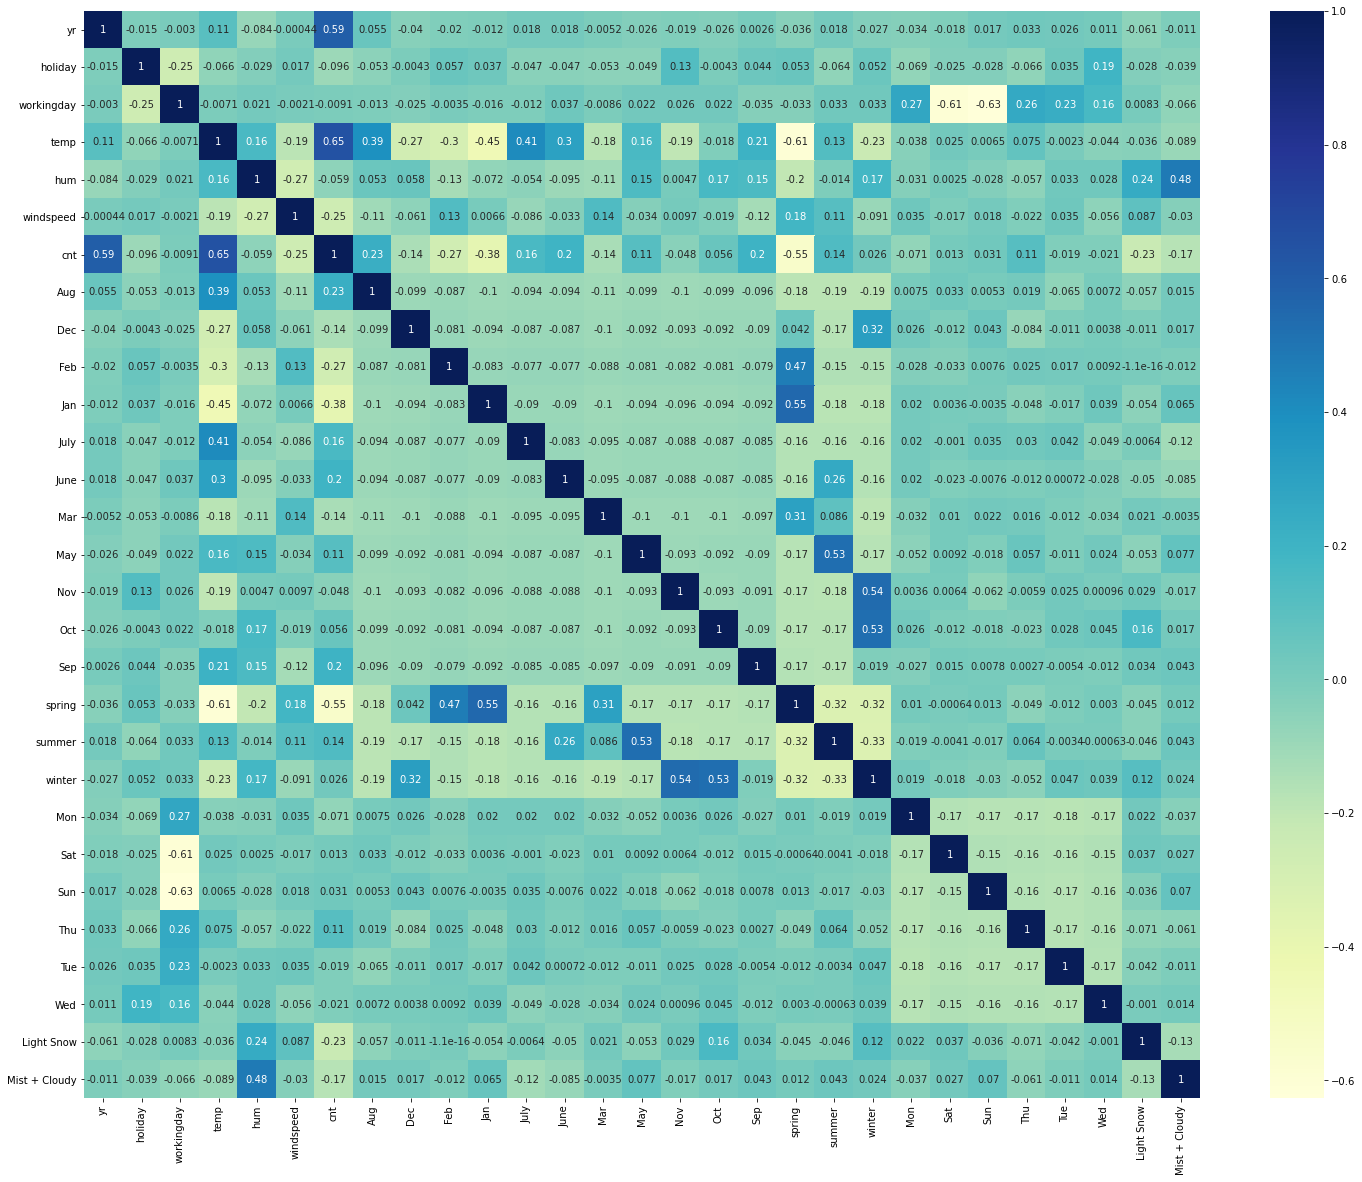

In [86]:
#again plotting the heatmap to check the correlationship after scaling and dummy columns
plt.figure(figsize=[25,20])
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')

In [24]:
#dividing the target and independent variables
y_train=df_train.pop('cnt')
X_train=df_train

# Using RFE to select the independent variables that can be used

In [25]:
#calling the LinearRegression function
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
#using RFE with no of feature as 15
rfe=RFE(lr,15)
rfe=rfe.fit(X_train,y_train)

In [27]:
#creating the list to check the col with their respective RFE vlaues
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [28]:
#selecting the cols with RFE value as True and dropping those with false 
cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'spring', 'summer', 'winter', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [29]:
#displaying the cols with RFE as false
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

# Step 6 - Creating Linear regression model

In [30]:
#creating the first linear model
X_train_lm=X_train[cols]
X_train_lm=sm.add_constant(X_train_lm)

lm=sm.OLS(y_train,X_train_lm).fit()

In [31]:
#checkig the summary for the first linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          8.15e-189
Time:                        23:17:46   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
yr                0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
hum              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the first linear model we could see that the p value of all the feature are less than 0.05(as per thumb rule) however for dec we can see that it is 0.04 somewhat closer.

In [33]:
#Dropping the const col for cheching VIF
X_train_lm.drop('const',axis=1,inplace=True)   

# checking the VIF

VIF gives the quantative idea how the feature are corelated with each other.It shows the colinearity amon the feature variables.
VIF=1/1-R^2

In [35]:
vif=pd.DataFrame()
vif['features']=X_train_lm.columns
vif['VIF']=[variance_inflation_factor(X_train_lm.values,i) for i in range(X_train_lm.shape[1])]
vif=vif.sort_values(['VIF'],ascending=False)
vif

,features,VIF
3,hum,30.888567
2,temp,17.794483
4,windspeed,4.722587
10,spring,4.368260
12,winter,4.063467
11,summer,2.817115
14,Mist + Cloudy,2.320887
0,yr,2.088836
8,Nov,1.845259
6,Jan,1.746001


From the above values it seem that as of now humidity and temp has very high colinearity .
But as of now we are going with dropping DEC variable with somehat relative high P vlaue and will check the vlaues of VIF after that.

# Creating the second linear model by dropping DEC variable first

In [37]:
X_train_lm1=X_train_lm.drop(['Dec'],axis=1)
X_train_lm1=sm.add_constant(X_train_lm1)

lm1=sm.OLS(y_train,X_train_lm1).fit()

In [38]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          4.41e-189
Time:                        23:32:20   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598      0.000       0.234       0.373
yr                0.2302      0.008     28.371      0.000       0.214       0.246
holiday          -0.0920      0.026     -3.582      0.000      -0.142      -0.042
temp              0.5055      0.035     14.369      0.000       0.436       0.575
hum              -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed        -0.1858      0.026     -7.190      0.000      -0.237      -0.135
Jan              -0.0341      0.018     -1.936      0.053      -0.069       0.001
July             -0.0559      0.018     -3.057      0.002      -0.092      -0.020
Nov              -0.0236      0.017     -1.362      0.174      -0.058       0.010
Sep               0.0802      0.017      4.775      0.000       0.047       0.113
spring           -0.0562      0.021     -2.652      0.008      -0.098      -0.015
summer            0.0479      0.015      3.168      0.002       0.018       0.078
winter            0.0972      0.018      5.421      0.000       0.062       0.132
Light Snow       -0.2404      0.026     -9.131      0.000      -0.292      -0.189
Mist + Cloudy    -0.0528      0.010     -5.047      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see after dropping DEC feature the p value for JAN and Nov variable has raised significantly.However there is no significant drop in the R^2 score value.
Let us now check the colinearity.

In [39]:
#dropping the constant
X_train_lm1=X_train_lm1.drop(['const'],axis=1)

In [40]:
#checking the VIF
vif=pd.DataFrame()
vif['features']=X_train_lm1.columns
vif['VIF']=[variance_inflation_factor(X_train_lm1.values,i) for i in range(X_train_lm1.shape[1])]
vif.sort_values(['VIF'],ascending=False)

,features,VIF
3,hum,29.088813
2,temp,16.800879
4,windspeed,4.716908
9,spring,4.365668
11,winter,3.776680
10,summer,2.797513
13,Mist + Cloudy,2.290493
0,yr,2.086117
5,Jan,1.665436
7,Nov,1.599070


We could see still the colinearity is high for hum and temp.

# Creating the third linear model by dropping Nov col as it has high p value

In [41]:
X_train_lm2=X_train_lm1.drop(['Nov'],axis=1)
X_train_lm2=sm.add_constant(X_train_lm2)

lm2=sm.OLS(y_train,X_train_lm2).fit()

In [43]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          7.59e-190
Time:                        23:41:23   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483      0.000       0.228       0.365
yr                0.2301      0.008     28.339      0.000       0.214       0.246
holiday          -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp              0.5124      0.035     14.706      0.000       0.444       0.581
hum              -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed        -0.1874      0.026     -7.253      0.000      -0.238      -0.137
Jan              -0.0333      0.018     -1.892      0.059      -0.068       0.001
July             -0.0556      0.018     -3.039      0.003      -0.092      -0.020
Sep               0.0827      0.017      4.951      0.000       0.050       0.116
spring           -0.0519      0.021     -2.476      0.014      -0.093      -0.011
summer            0.0502      0.015      3.336      0.001       0.021       0.080
winter            0.0919      0.018      5.247      0.000       0.057       0.126
Light Snow       -0.2392      0.026     -9.084      0.000      -0.291      -0.187
Mist + Cloudy    -0.0526      0.010     -5.025      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the p-value for the Jan is still high which signifies it's not that significant as p value greater than 0.05 means it has failed to reject the null hypothesis and in our case null hypothesis is the variable is insignificant.

# Checking for VIF

In [44]:
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [45]:
vif=pd.DataFrame()
vif['features']=X_train_lm2.columns
vif['VIF']=[variance_inflation_factor(X_train_lm2.values,i) for i in range(X_train_lm2.shape[1])]
vif.sort_values(['VIF'],ascending=False)

,features,VIF
3,hum,29.015175
2,temp,16.710246
4,windspeed,4.660625
8,spring,4.338685
10,winter,3.360856
9,summer,2.790191
12,Mist + Cloudy,2.286562
0,yr,2.085279
5,Jan,1.665369
6,July,1.591292


# Creating 4th linear model by dropping Jan

In [46]:
X_train_lm3=X_train_lm2.drop(['Jan'],axis=1)
X_train_lm3=sm.add_constant(X_train_lm3)

lm3=sm.OLS(y_train,X_train_lm3).fit()

In [47]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.95e-190
Time:                        23:48:57   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.034      8.258      0.000       0.217       0.353
yr                0.2294      0.008     28.208      0.000       0.213       0.245
holiday          -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp              0.5299      0.034     15.728      0.000       0.464       0.596
hum              -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed        -0.1822      0.026     -7.074      0.000      -0.233      -0.132
July             -0.0572      0.018     -3.123      0.002      -0.093      -0.021
Sep               0.0833      0.017      4.973      0.000       0.050       0.116
spring           -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer            0.0531      0.015      3.536      0.000       0.024       0.083
winter            0.0976      0.017      5.643      0.000       0.064       0.132
Light Snow       -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Mist + Cloudy    -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now the P value seems to be perfect for every independent variable i.e all are significantly low and also the R squared value hasn't dropped significantly.

# Checking the VIF

In [48]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [49]:
vif=pd.DataFrame()
vif['features']=X_train_lm3.columns
vif['VIF']=[variance_inflation_factor(X_train_lm3.values,i) for i in range(X_train_lm3.shape[1])]
vif.sort_values(['VIF'],ascending=False)

,features,VIF
3,hum,28.026853
2,temp,16.029660
4,windspeed,4.653075
7,spring,4.009485
9,winter,3.331939
8,summer,2.788633
11,Mist + Cloudy,2.284092
0,yr,2.076227
5,July,1.583964
6,Sep,1.384884


Still we can see hum has high colinearity and we will drop it in next linear model creation.

# Creating the 5th linear model by dropping the hum col

In [50]:
X_train_lm4=X_train_lm3.drop(['hum'],axis=1)
X_train_lm4=sm.add_constant(X_train_lm4)

lm4=sm.OLS(y_train,X_train_lm4).fit()

In [51]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          5.06e-187
Time:                        23:53:30   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
yr                0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp              0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
July             -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep               0.0768      0.017      4.517      0.000       0.043       0.110
spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer            0.0465      0.015      3.051      0.002       0.017       0.076
winter            0.0817      0.017      4.730      0.000       0.048       0.116
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We could see that the p vlaues are stil okay and there is no much drop in r squared value.

# Checking the VIF

In [52]:
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [53]:
vif=pd.DataFrame()
vif['features']=X_train_lm4.columns
vif['VIF']=[variance_inflation_factor(X_train_lm4.values,i) for i in range(X_train_lm4.shape[1])]
vif.sort_values(['VIF'],ascending=False)

,features,VIF
2,temp,5.091960
3,windspeed,4.600677
7,summer,2.226926
6,spring,2.078996
0,yr,2.067001
8,winter,1.780437
4,July,1.583937
10,Mist + Cloudy,1.551976
5,Sep,1.336854
9,Light Snow,1.081377


After dropping the hum vairable we can see that VIF for temp has dropped drastically but it's still more than 5 and since it has some business importance we can't drop this col.
So in order to reduce it's VIF value we are going ahead with dropping the July col as compared to other it has relatively high p vlaue.

# Creating the sixth linear model by dropping July col

In [54]:
X_train_lm5=X_train_lm4.drop(['July'],axis=1)
X_train_lm5=sm.add_constant(X_train_lm5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          1.47e-186
Time:                        00:00:17   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447      0.000       0.133       0.249
yr                0.2341      0.008     28.237      0.000       0.218       0.250
holiday          -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp              0.4777      0.033     14.423      0.000       0.413       0.543
windspeed        -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Sep               0.0910      0.016      5.566      0.000       0.059       0.123
spring           -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer            0.0621      0.014      4.350      0.000       0.034       0.090
winter            0.0945      0.017      5.630      0.000       0.062       0.127
Light Snow       -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist + Cloudy    -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By dropping the July variable we can see the p value is all very low and the r sqaured value hasn't dropped much.
So we can take this model as final model as all p values are less than 0 and Rsqaured value is 0.83 which explains that this model expalins 83% variance of the portion of the data.

# Checking the VIF

In [55]:
X_train_lm5.drop(['const'],axis=1,inplace=True)

In [56]:
vif=pd.DataFrame()
vif['feature']=X_train_lm5.columns
vif['VIF']=[variance_inflation_factor(X_train_lm5.values,i) for i in range(X_train_lm5.shape[1])]
vif.sort_values(['VIF'],ascending=False)

,feature,VIF
3,windspeed,4.595481
2,temp,3.837542
0,yr,2.066259
5,spring,1.993961
6,summer,1.902953
7,winter,1.629128
9,Mist + Cloudy,1.549228
4,Sep,1.228982
8,Light Snow,1.081103
1,holiday,1.042654


# So by checking the VIF we can say that we can go ahead with lm5 model.
The p value for all indpendednt variables are less than 0.05 thus rejecting the null hypothesis.
The VIF value for all the variable are less that 5.
The R sqaured value is 0.833 and adjusted R sqaured value is 0.829.

The variable that is being finally selected are windspeed,temp,yr,spring,summer,winter,Mist + Cloudy,Sep,Light Snow & holiday

In [57]:
X_train_lm5=sm.add_constant(X_train_lm5)
X_train_lm5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Sep', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

# Checking for the assumption of linear regression model on training dataset

# Checking for linear relationship

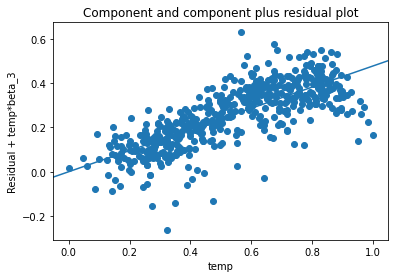

In [58]:
sm.graphics.plot_ccpr(lm5, 'temp')
plt.show()

We could see that the linearity is being preserved and with increase in temp the cnt increases.

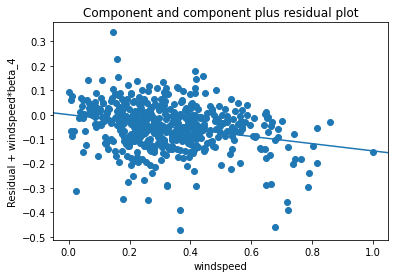

In [236]:
sm.graphics.plot_ccpr(lm5, 'windspeed')
plt.show()

We could see that the linearity is being preserved and with increase in windspeed the cnt decreases.

# Step-7 residuals analysis on train datasat 

In [60]:
#finding the predicted values using the model and X_train_lm5 and then finding the res
y_train_pred=lm5.predict(X_train_lm5)
res=y_train-y_train_pred

# Checking for Homoscedasticity

Text(0, 0.5, 'error/residual')

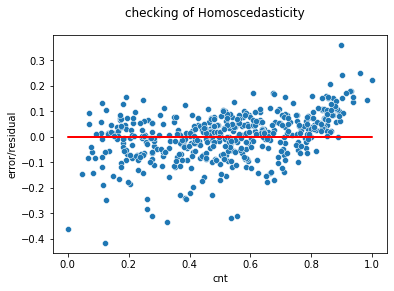

In [62]:
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train-y_train),'r')
plt.suptitle('checking of Homoscedasticity')
plt.xlabel('cnt')
plt.ylabel('error/residual')

From the above plot we can see that after plotting the residuals against y_train there is no pattern being followed(any parabolic pattern) hence we can confirm that homoscedasticity is maintained.

# checking for normalized mean error

<AxesSubplot:ylabel='Density'>

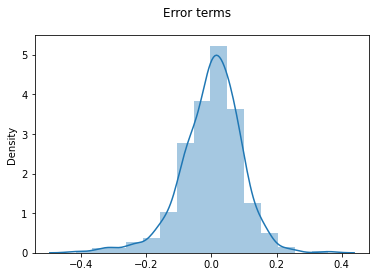

In [250]:
plt.suptitle('Error terms')
sns.distplot(res,bins=15)

From the above plot it is observed that the residual are normally distributed i.e the means of the error is 0.

# Step 8-Making prediction using test dataset

# Scaling of the test data set is performed

In [68]:
#scaling is performed on the test dataset
df_test[vars]=scaler.transform(df_test[vars])

In [69]:
#checking the summary
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.254545,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.436599,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#assignung the y_test and X_test
y_test=df_test.pop('cnt')
X_test=df_test

In [71]:
X_train_lm5=X_train_lm5.drop(['const'],axis=1)

In [72]:
#assigning the col of X_train_lm5
cols1=X_train_lm5.columns
cols1

Index(['yr', 'holiday', 'temp', 'windspeed', 'Sep', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [223]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'spring', 'summer', 'winter', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [73]:
# making the X_test col same as X_train
X_test=X_test[cols1]

In [74]:
#predicting the y_pred_test
X_test_lm=sm.add_constant(X_test)
y_pred_test=lm5.predict(X_test_lm)

# Checking R sqaured score for test dataset 

In [75]:
r2_score(y_test,y_pred_test)

0.8038195990728842

In [227]:
X_test.shape

(220, 10)

# Checking for adjusted R sqaured value for test dataset

In [76]:
r2=0.8038195990728842

# n is number of rows present in test dataset

n = X_test.shape[0]


# number of feature present in the dataset
p = X_test.shape[1]

# finding the adjusted R sqaured value using the X_test dataset

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7944329770189553

From the above value it seems there is no much drop in adjusted R squared value .for train dataset it was 0.82 and for test dataset it is 0.79.Hence there is drop of 3% which can be acceptable.

# Model Evaluation

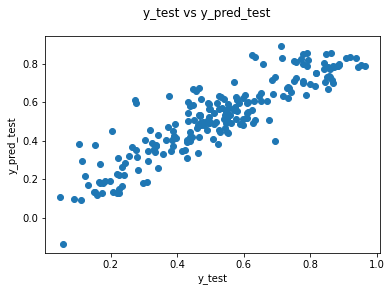

In [229]:
plt.scatter(y_test,y_pred_test)
plt.suptitle('y_test vs y_pred_test')
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

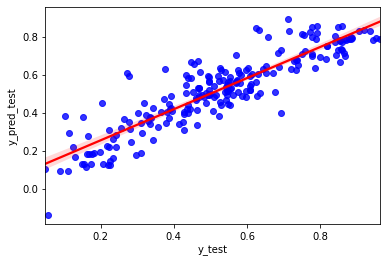

In [230]:
sns.regplot(x=y_test, y=y_pred_test, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

# The equation of our best fit line is:
y=0.1909 + 0.2341*yr - 0.0963*holiday + 0.4777*temp -0.1481*windspeed +0.0910*Sep -0.0554*Spring +0.0621*summer +0.09458*winter -0.2850*Light Snow -0.0787*Mist+Cloudy

# Analysing the model with test and train dataset

R^2 for train:0.83
Adjusted R^2 for train:0.82

R^2 for test:0.80
Adjusted R^2 for test:0.79

the difference between R squared is 2% and difference between adjusted R sqaured is 3%.

Temp has the highest coefficeint with value 0.477 which tells us that with an increase in unit of temp the cnt i.e target variable will increase 0.477 times.

Also we can see there are independent variable with negative coefficient that tell us that bike cont decreases with the increase in the below variables:
holiday,windspeed,spring,Light Snow and Mist + Cloudy

# Business solution:
Temp variable seems to be an important variable for bike count.
Bike count seems to be more for the year 2019.
The company should avoid bike registeration on Light Snow and Mist + Cloudy weather situation.
The bike registeraton is more in the month of september.